In [92]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go

In [93]:
transactions = pd.read_csv('../data/acct_transactions.csv', delimiter = ',', index_col=0).drop('interest_amt', axis=1)
transactions

,tran_amt,principal_amt,tran_count
0,0.600630,0.607446,0.636364
1,0.626279,0.632778,0.162338
2,0.520468,0.526336,0.636364
3,0.677318,0.684391,0.207792
4,0.603476,0.610324,0.636364
...,...,...,...
1393,0.610179,0.614267,0.493506
1394,0.625884,0.632551,0.246753
1395,0.722205,0.728928,0.142857
1396,0.609270,0.616183,0.240260


In [94]:
# define k-means
# kmeans first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

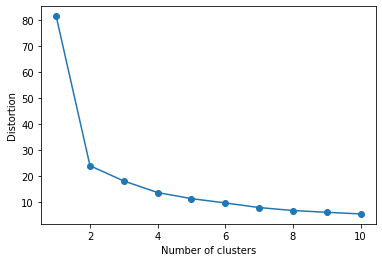

In [95]:
plot_distortion(transactions)
# looks like 4 is the winner

In [96]:
# set up k_means params
km = KMeans(n_clusters=2,
            n_init=10,
            random_state=0)

In [97]:
# fit and predict
y_km = km.fit_predict(transactions)
y_km

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [98]:
transactions['cluster'] = y_km
transactions

,tran_amt,principal_amt,tran_count,cluster
0,0.600630,0.607446,0.636364,1
1,0.626279,0.632778,0.162338,0
2,0.520468,0.526336,0.636364,1
3,0.677318,0.684391,0.207792,0
4,0.603476,0.610324,0.636364,1
...,...,...,...,...
1393,0.610179,0.614267,0.493506,1
1394,0.625884,0.632551,0.246753,0
1395,0.722205,0.728928,0.142857,0
1396,0.609270,0.616183,0.240260,0


In [99]:
radar_scaled = transactions.groupby('cluster').mean()
radar_scaled

,tran_amt,principal_amt,tran_count
cluster,,,
0,0.616421,0.621397,0.199037
1,0.557339,0.563000,0.608951


In [100]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:4].values,
                                        theta=data.columns[:4],
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [101]:
plotRadarChart(radar_scaled, "Transaction segments")